In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
os.listdir()

['ml-1m.inter',
 'ml-1m.item',
 'README.md',
 'ml-1m.user',
 'data_split.ipynb',
 'ml-1m.p1.inter',
 'ml-1m.p2.inter',
 'ml-1m.p3.inter']

In [2]:
with open("./ml-1m.inter") as f:
    all_data = f.readlines()
del all_data[0]
all_data = [list(map(float,line.split())) for line in all_data]
all_data = np.array(all_data)
all_data = all_data[:,0:3]
print(len(all_data))

1000209


In [3]:
test_num = np.round(len(all_data) * 0.1)
test_num

100021.0

In [4]:
all_items = all_data[:,1].astype(int)
unique, count = np.unique(all_items, return_counts=True)
unique_cnt = {uniq:cnt for uniq,cnt in zip(unique, count)}
item_num = len(unique)
item_per_cnt = np.round(test_num / item_num)
print("test_num: ", test_num)
print("item_num: ",item_num)
print("item_per_cnt: ", item_per_cnt)

test_num:  100021.0
item_num:  3706
item_per_cnt:  27.0


In [5]:
p1=[]
# p2=[]
p3=[]

all_data = all_data.astype(int)

for index, unique_item in enumerate(unique_cnt.keys()):
    item_test_num = min(np.round(unique_cnt[unique_item] * 0.2).astype(int), item_per_cnt.astype(int))
    item_ls = all_data[all_data[:,1]==unique_item]
    np.random.shuffle(item_ls)
    item_ls = item_ls.tolist()
    p3.extend(item_ls[-item_test_num:])
    p1.extend(item_ls[:-item_test_num])
    

In [6]:
print(len(p3)+len(p1))
print(len(p1))


1000209
934736


<BarContainer object of 3706 artists>

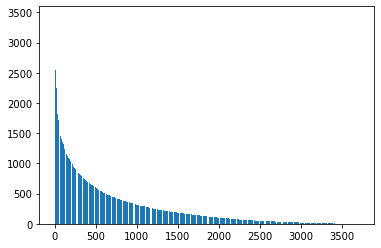

In [7]:
count=sorted(count, reverse=True)
plt.bar(np.arange(len(unique)),count)

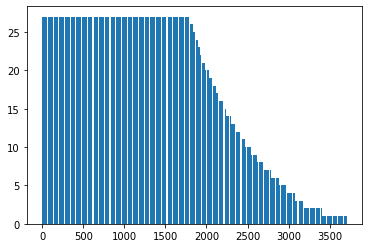

In [8]:
p3_item = np.array(p3)[:,1]
unique, count = np.unique(p3_item, return_counts=True)
count = sorted(count, reverse=True)
plt.bar(np.arange(len(unique)),count)
plt.show()

In [9]:
token = ['user_id:token',	'item_id:token',	'rating:float']

all_data = p1

split_num = int(len(all_data) * 0.1)
np.random.shuffle(all_data)

tr_data = all_data[ split_num:]
val_data = all_data[ :split_num]
####################################################
print(len(val_data))
####################################################
firstline_str = "\t".join(token) + "\n"

with open("ml-1m.p1.inter", 'w') as f:
    f.write(firstline_str)
    for line in tr_data:
        line_str = "\t".join([str(a) for a in line]) + "\n"
        f.write(line_str)

with open("ml-1m.p2.inter", 'w') as f:
    f.write(firstline_str)
    for line in val_data:
        line_str = "\t".join([str(a) for a in line]) + "\n"
        f.write(line_str)

93473


In [10]:
all_data = p3

with open("ml-1m.p3.inter", 'w') as f:
    f.write(firstline_str)
    for line in all_data:
        line_str = "\t".join([str(a) for a in line]) + "\n"
        f.write(line_str)